In [91]:
import nbimporter
from lr_rfr_streampredictions import *

import os
import torch
from sklearn.svm import SVR

pd.set_option('display.max_rows', 100)

In [45]:
data = pd.read_csv('../csv_files/alltime_socials.csv')
data = data.sample(500000, random_state=42)
print(data.columns)

Index(['ARTIST', 'TITLE', 'UNIFIED_SONG_ID', 'DATE', 'RELEASE_DATE',
       'THIS_DAY', 'THIS_WEEK', 'DAYS_SINCE_RELEASE', 'DAY_OF_WEEK', 'RN',
       'END_OF_WEEK', 'POPULARITY', 'SPOTIFY_FOLLOWER_COUNT',
       'SPOTIFY_LISTENERS_COUNT', 'SPFOLDAY0', 'SPFOLDAY1', 'SPFOLDAY2',
       'SPFOLDAY3', 'SPFOLDAY4', 'SPFOLDAY5', 'SPFOLDAY6', 'SPLISDAY0',
       'SPLISDAY1', 'SPLISDAY2', 'SPLISDAY3', 'SPLISDAY4', 'SPLISDAY5',
       'SPLISDAY6', 'DAY_0', 'DAY_1', 'DAY_2', 'DAY_3', 'DAY_4', 'DAY_5',
       'DAY_6', 'TARGET', 'IG_FOLLOWER_COUNT', 'IGFOLDAY0', 'IGFOLDAY1',
       'IGFOLDAY2', 'IGFOLDAY3', 'IGFOLDAY4', 'IGFOLDAY5', 'IGFOLDAY6'],
      dtype='object')


In [46]:
print(data.isnull().sum())

ARTIST                        48
TITLE                          2
UNIFIED_SONG_ID                0
DATE                           0
RELEASE_DATE                   0
THIS_DAY                       0
THIS_WEEK                   7760
DAYS_SINCE_RELEASE             0
DAY_OF_WEEK                    0
RN                             0
END_OF_WEEK                    0
POPULARITY                     0
SPOTIFY_FOLLOWER_COUNT      7078
SPOTIFY_LISTENERS_COUNT     9402
SPFOLDAY0                   7078
SPFOLDAY1                   7308
SPFOLDAY2                   7744
SPFOLDAY3                   7565
SPFOLDAY4                   7707
SPFOLDAY5                   9333
SPFOLDAY6                   9236
SPLISDAY0                   9402
SPLISDAY1                   9588
SPLISDAY2                  10103
SPLISDAY3                   9951
SPLISDAY4                  10064
SPLISDAY5                  11675
SPLISDAY6                  11602
DAY_0                          0
DAY_1                        533
DAY_2     

In [66]:
train_valid, test = train_test_split(data, test_size=0.2, random_state=42)
train, valid = train_test_split(train_valid, test_size=0.2, random_state=42)

features = [
    'days_since_release', 'popularity', 'spotify_follower_count', 'spotify_listeners_count', 
    'spfolday0', 'spfolday1', 'spfolday2', 'spfolday3', 'spfolday4', 'spfolday5', 'spfolday6',
    'splisday0', 'splisday1', 'splisday2', 'splisday3', 'splisday4', 'splisday5', 'splisday6',
    'day_0', 'day_1', 'day_2', 'day_3', 'day_4', 'day_5', 'day_6', 'ig_follower_count',
    'igfolday0', 'igfolday1', 'igfolday2', 'igfolday3', 'igfolday4', 'igfolday5', 'igfolday6', 
]

def rename_columns(data):
    data.columns = data.columns.str.lower()
    data = data.rename(columns={"target": "Next Full Week Streams", "next full week streams": "Next Full Week Streams"})
    return data

def select_cols(data, cols):
    temp = data.copy()
    return temp[cols]
    
train_temp = rename_columns(train)
train_temp = select_cols(train_temp, features + ['Next Full Week Streams'])
train_temp

,days_since_release,popularity,spotify_follower_count,spotify_listeners_count,spfolday0,spfolday1,spfolday2,spfolday3,spfolday4,spfolday5,...,day_6,ig_follower_count,igfolday0,igfolday1,igfolday2,igfolday3,igfolday4,igfolday5,igfolday6,Next Full Week Streams
777863,564,16,4747561.0,6257931.0,4747561.0,4747423.0,4747300.0,4747167.0,4746985.0,4746855.0,...,14409.0,4370457.0,4370457.0,4371459.0,4372192.0,4372536.0,4373055.0,4372466.0,4374184.0,91024
1931827,48,25,693626.0,8101873.0,693626.0,251295.0,385644.0,251225.0,251196.0,251118.0,...,11918.0,145319.0,145319.0,69797.0,145272.0,69810.0,69816.0,69804.0,69801.0,71765
1168803,3271,68,882882.0,3466277.0,882882.0,3097223.0,3096884.0,882542.0,882426.0,3095888.0,...,15483.0,4913.0,4913.0,4913.0,NaN,513782.0,585318.0,513938.0,514241.0,95799
941087,3660,23,6751726.0,6715146.0,6751726.0,6749710.0,6747915.0,6745968.0,6744013.0,6742011.0,...,13791.0,13992589.0,13992589.0,13990633.0,13987878.0,13988071.0,13988554.0,13989376.0,13985230.0,94336
319213,3300,27,NaN,NaN,NaN,7343319.0,7342120.0,NaN,NaN,NaN,...,1655.0,NaN,NaN,NaN,NaN,NaN,NaN,15056182.0,15056660.0,11007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1748593,342,10,112518.0,259114.0,112518.0,112447.0,112372.0,112316.0,112255.0,112193.0,...,1697.0,46587.0,46587.0,46555.0,46503.0,46432.0,46375.0,46308.0,46325.0,11690
54552,1848,47,936305.0,16257774.0,936305.0,935813.0,935367.0,934927.0,934375.0,933875.0,...,26691.0,1999447.0,1999447.0,1999298.0,1998983.0,1998951.0,1998403.0,1997589.0,1997108.0,174943
901694,20436,66,3266117.0,12928011.0,3266117.0,3266117.0,3265307.0,3264610.0,3263872.0,3263157.0,...,55135.0,224364.0,224364.0,224379.0,224421.0,224435.0,224422.0,224400.0,224355.0,376567
1627923,631,44,397719.0,5647161.0,397719.0,1250542.0,1250187.0,397232.0,1249701.0,396859.0,...,5837.0,237135.0,237135.0,188474.0,188502.0,237181.0,237174.0,188463.0,237266.0,36129


In [67]:
sp_fols = features[4:11]
sp_lis = features[11:18]
days = features[18:25]
ig_fols = features[26:33]

train_temp = interpolate_vals(train_temp, sp_fols)
train_temp = interpolate_vals(train_temp, sp_lis)
train_temp = interpolate_vals(train_temp, days)
train_temp = interpolate_vals(train_temp, ig_fols)      

In [68]:
train_temp.isnull().sum()

days_since_release             0
popularity                     0
spotify_follower_count      4539
spotify_listeners_count     5995
spfolday0                      0
spfolday1                      0
spfolday2                      0
spfolday3                      0
spfolday4                      0
spfolday5                      0
spfolday6                      0
splisday0                      0
splisday1                      0
splisday2                      0
splisday3                      0
splisday4                      0
splisday5                      0
splisday6                      0
day_0                          0
day_1                          0
day_2                          0
day_3                          0
day_4                          0
day_5                          0
day_6                          0
ig_follower_count          23708
igfolday0                      0
igfolday1                      0
igfolday2                      0
igfolday3                      0
igfolday4 

In [69]:

null_cols = ['days_since_release', 'spotify_follower_count', 'spotify_listeners_count', 'ig_follower_count']

def fill_mode(data, cols):
    data[cols] = data[cols].replace(0, np.nan)
    data[cols] = data[cols].apply(lambda col: col.fillna(col.mode()[0]))
    return data

train_temp = fill_mode(train_temp, null_cols)
train_temp.isnull().sum()

days_since_release         0
popularity                 0
spotify_follower_count     0
spotify_listeners_count    0
spfolday0                  0
spfolday1                  0
spfolday2                  0
spfolday3                  0
spfolday4                  0
spfolday5                  0
spfolday6                  0
splisday0                  0
splisday1                  0
splisday2                  0
splisday3                  0
splisday4                  0
splisday5                  0
splisday6                  0
day_0                      0
day_1                      0
day_2                      0
day_3                      0
day_4                      0
day_5                      0
day_6                      0
ig_follower_count          0
igfolday0                  0
igfolday1                  0
igfolday2                  0
igfolday3                  0
igfolday4                  0
igfolday5                  0
igfolday6                  0
Next Full Week Streams     0
dtype: int64

In [70]:
def log_apply(data, *cols, prediction_col):
    copy = data.copy()
    for col in cols:
        copy[col] = np.log(copy[col])
        copy = copy.rename(columns={col: "log " + col})
    return copy[[c for c in copy if c != ('log ' + prediction_col)] + ['log ' + prediction_col]]


train_log = log_apply(
    train_temp, 
    *(days + sp_fols + sp_lis + ig_fols + ['days_since_release', 'spotify_follower_count', 'spotify_listeners_count', 'ig_follower_count', 'Next Full Week Streams']),
    prediction_col='Next Full Week Streams'
)

train_log

,log days_since_release,popularity,log spotify_follower_count,log spotify_listeners_count,log spfolday0,log spfolday1,log spfolday2,log spfolday3,log spfolday4,log spfolday5,...,log day_6,log ig_follower_count,log igfolday0,log igfolday1,log igfolday2,log igfolday3,log igfolday4,log igfolday5,log igfolday6,log Next Full Week Streams
777863,6.335054,16.0,15.373142,15.649360,15.373142,15.373113,15.373087,15.373059,15.373020,15.372993,...,9.575608,15.290378,15.290378,15.290607,15.290775,15.290854,15.290972,15.290838,15.291231,11.418878
1931827,3.871201,25.0,13.449688,15.907606,13.449688,12.434383,12.862670,12.434104,12.433989,12.433678,...,9.385805,11.886687,11.886687,11.153346,11.886363,11.153533,11.153618,11.153447,11.153404,11.181152
1168803,8.092851,68.0,13.690947,15.058592,13.690947,14.946016,14.945907,13.690562,13.690430,14.945585,...,9.647498,8.499640,8.499640,8.499640,12.465924,13.149554,13.279911,13.149858,13.150447,11.470008
941087,8.205218,23.0,15.725309,15.719876,15.725309,15.725010,15.724744,15.724456,15.724166,15.723869,...,9.531771,16.454038,16.454038,16.453899,16.453702,16.453715,16.453750,16.453809,16.453512,11.454618
319213,8.101678,27.0,16.206626,16.755543,15.809301,15.809301,15.809138,15.809138,15.809138,15.809138,...,7.411556,16.167817,16.527299,16.527299,16.527299,16.527299,16.527299,16.527299,16.527331,9.306287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1748593,5.834811,10.0,11.630868,12.465023,11.630868,11.630237,11.629570,11.629072,11.628528,11.627976,...,7.436617,10.749077,10.749077,10.748390,10.747272,10.745744,10.744516,10.743070,10.743437,9.366489
54552,7.521859,47.0,13.749697,16.604082,13.749697,13.749171,13.748694,13.748224,13.747633,13.747098,...,10.192082,14.508381,14.508381,14.508307,14.508149,14.508133,14.507859,14.507452,14.507211,12.072215
901694,9.925053,66.0,14.999112,16.374907,14.999112,14.999112,14.998864,14.998651,14.998425,14.998206,...,10.917540,12.321025,12.321025,12.321092,12.321279,12.321341,12.321283,12.321185,12.320985,12.838851
1627923,6.447306,44.0,12.893501,15.546663,12.893501,14.039088,14.038804,12.892276,14.038415,12.891336,...,8.671972,12.376385,12.376385,12.146715,12.146864,12.376579,12.376549,12.146657,12.376937,10.494851


In [72]:
train_final = (train.pipe(rename_columns)
 .pipe(select_cols, cols=(features + ['Next Full Week Streams']))
 .pipe(interpolate_vals, cols=days)
 .pipe(interpolate_vals, cols=sp_fols)
 .pipe(interpolate_vals, cols=sp_lis)
 .pipe(interpolate_vals, cols=ig_fols)
 .pipe(fill_mode, cols=['days_since_release', 'spotify_follower_count', 'spotify_listeners_count', 'ig_follower_count'])
 .pipe(
    log_apply, 
    *(days + sp_fols + sp_lis + ig_fols + ['days_since_release', 'spotify_follower_count', 'spotify_listeners_count', 'ig_follower_count', 'Next Full Week Streams']),
    prediction_col='Next Full Week Streams'
    )
)

new_features = [
    'log days_since_release', 'popularity', 'log spotify_follower_count', 'log spotify_listeners_count', 
    'log spfolday0', 'log spfolday1', 'log spfolday2', 'log spfolday3', 'log spfolday4', 'log spfolday5', 'log spfolday6',
    'log splisday0', 'log splisday1', 'log splisday2', 'log splisday3', 'log splisday4', 'log splisday5', 'log splisday6',
    'log day_0', 'log day_1', 'log day_2', 'log day_3', 'log day_4', 'log day_5', 'log day_6', 'log ig_follower_count',
    'log igfolday0', 'log igfolday1', 'log igfolday2', 'log igfolday3', 'log igfolday4', 'log igfolday5', 'log igfolday6', 
]

valid_final = (valid.pipe(rename_columns)
 .pipe(select_cols, cols=(features + ['Next Full Week Streams']))
 .pipe(interpolate_vals, cols=days)
 .pipe(interpolate_vals, cols=sp_fols)
 .pipe(interpolate_vals, cols=sp_lis)
 .pipe(interpolate_vals, cols=ig_fols)
 .pipe(fill_mode, cols=['days_since_release', 'spotify_follower_count', 'spotify_listeners_count', 'ig_follower_count'])
 .pipe(
    log_apply, 
    *(days + sp_fols + sp_lis + ig_fols + ['days_since_release', 'spotify_follower_count', 'spotify_listeners_count', 'ig_follower_count', 'Next Full Week Streams']),
    prediction_col='Next Full Week Streams'
    )
)

test_final = (test.pipe(rename_columns)
 .pipe(select_cols, cols=(features + ['Next Full Week Streams']))
 .pipe(interpolate_vals, cols=days)
 .pipe(interpolate_vals, cols=sp_fols)
 .pipe(interpolate_vals, cols=sp_lis)
 .pipe(interpolate_vals, cols=ig_fols)
 .pipe(fill_mode, cols=['days_since_release', 'spotify_follower_count', 'spotify_listeners_count', 'ig_follower_count'])
 .pipe(
    log_apply, 
    *(days + sp_fols + sp_lis + ig_fols + ['days_since_release', 'spotify_follower_count', 'spotify_listeners_count', 'ig_follower_count', 'Next Full Week Streams']),
    prediction_col='Next Full Week Streams'
    )
)

X_train = train_final[new_features]
Y_train = train_final['log Next Full Week Streams']

X_valid = valid_final[new_features]
Y_valid = valid_final['log Next Full Week Streams']

X_test = test_final[new_features]
Y_test = test_final['log Next Full Week Streams']

X_train

,log days_since_release,popularity,log spotify_follower_count,log spotify_listeners_count,log spfolday0,log spfolday1,log spfolday2,log spfolday3,log spfolday4,log spfolday5,...,log day_5,log day_6,log ig_follower_count,log igfolday0,log igfolday1,log igfolday2,log igfolday3,log igfolday4,log igfolday5,log igfolday6
777863,6.335054,16.0,15.373142,15.649360,15.373142,15.373113,15.373087,15.373059,15.373020,15.372993,...,9.414016,9.575608,15.290378,15.290378,15.290607,15.290775,15.290854,15.290972,15.290838,15.291231
1931827,3.871201,25.0,13.449688,15.907606,13.449688,12.434383,12.862670,12.434104,12.433989,12.433678,...,9.376787,9.385805,11.886687,11.886687,11.153346,11.886363,11.153533,11.153618,11.153447,11.153404
1168803,8.092851,68.0,13.690947,15.058592,13.690947,14.946016,14.945907,13.690562,13.690430,14.945585,...,9.553717,9.647498,8.499640,8.499640,8.499640,12.465924,13.149554,13.279911,13.149858,13.150447
941087,8.205218,23.0,15.725309,15.719876,15.725309,15.725010,15.724744,15.724456,15.724166,15.723869,...,9.450144,9.531771,16.454038,16.454038,16.453899,16.453702,16.453715,16.453750,16.453809,16.453512
319213,8.101678,27.0,16.206626,16.755543,15.809301,15.809301,15.809138,15.809138,15.809138,15.809138,...,7.362645,7.411556,16.167817,16.527299,16.527299,16.527299,16.527299,16.527299,16.527299,16.527331
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1748593,5.834811,10.0,11.630868,12.465023,11.630868,11.630237,11.629570,11.629072,11.628528,11.627976,...,7.338238,7.436617,10.749077,10.749077,10.748390,10.747272,10.745744,10.744516,10.743070,10.743437
54552,7.521859,47.0,13.749697,16.604082,13.749697,13.749171,13.748694,13.748224,13.747633,13.747098,...,10.123105,10.192082,14.508381,14.508381,14.508307,14.508149,14.508133,14.507859,14.507452,14.507211
901694,9.925053,66.0,14.999112,16.374907,14.999112,14.999112,14.998864,14.998651,14.998425,14.998206,...,10.915488,10.917540,12.321025,12.321025,12.321092,12.321279,12.321341,12.321283,12.321185,12.320985
1627923,6.447306,44.0,12.893501,15.546663,12.893501,14.039088,14.038804,12.892276,14.038415,12.891336,...,8.606485,8.671972,12.376385,12.376385,12.146715,12.146864,12.376579,12.376549,12.146657,12.376937


In [90]:
# Define a pipeline to search for the best combination of PCA truncation
# and classifier regularization.
pca = PCA()

# Define a Standard Scaler to normalize inputs
scaler = StandardScaler()

lr_pipe = Pipeline([
     ("scaler", scaler), 
     ("pca", pca), 
     ("regressor", Lasso())
])

# Parameters of pipelines can be set using '__' separated parameter names:
lr_params = {
    "pca__n_components": [20, 25, 30],
    "regressor": [Ridge(), Lasso()],
    "regressor__fit_intercept": [True, False],
    "regressor__alpha": [0.001, 0.1, 1.0]
}

search = GridSearchCV(lr_pipe, lr_params, cv=10, scoring='neg_mean_absolute_error', n_jobs=-1)
search.fit(X_train, Y_train)


/Users/willcoomans/opt/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
python(54306) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('regressor', Lasso())]),
             n_jobs=-1,
             param_grid={'pca__n_components': [20, 25, 30],
                         'regressor': [Ridge(), Lasso(alpha=0.001)],
                         'regressor__alpha': [0.001, 0.1, 1.0],
                         'regressor__fit_intercept': [True, False]},
             scoring='neg_mean_absolute_error')

In [82]:
search.best_params_

{'pca__n_components': 12,
 'regressor': Ridge(alpha=0.001),
 'regressor__alpha': 0.001,
 'regressor__fit_intercept': True}

In [83]:
best = search.best_estimator_
best

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=12)),
                ('regressor', Ridge(alpha=0.001))])

In [87]:
Y_train_pred = best.predict(X_train)
print(f'{mean_absolute_error(np.e**Y_train_pred, np.e**Y_train):0.3e}')

1.820e+04


In [88]:
Y_valid_pred = best.predict(X_valid)

print(f'{mean_absolute_error(np.e**Y_valid, np.e**Y_valid_pred):0.3e}')

1.777e+04


In [89]:
Y_test_pred = best.predict(X_test)

print(f'{mean_absolute_error(np.e**Y_test, np.e**Y_test_pred):0.3e}')

1.754e+04


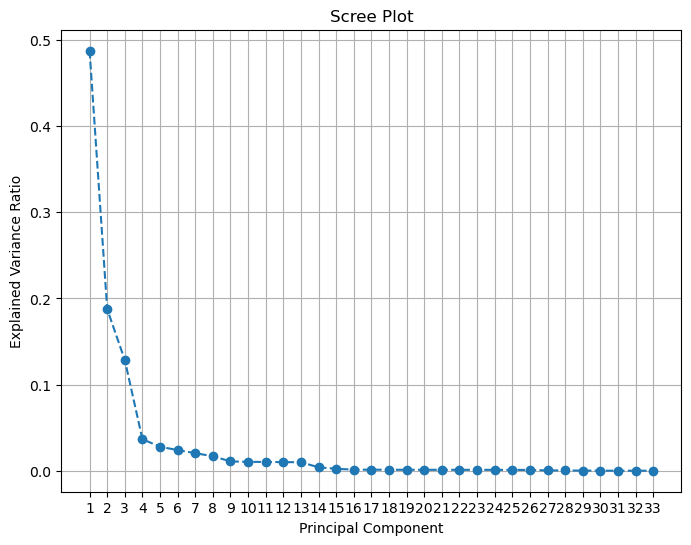

In [266]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

pca = PCA()
pca.fit_transform(X_scaled)

explained_variance_ratio = pca.explained_variance_ratio_

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.grid(True)
plt.show()

tensor([1, 2, 3])